In [1]:
import torch.optim as optim
import torch
import random
import Prediction
from model import *
from Features import Imageloader as I
from Features import Preprocessing as P
import os

In [2]:
for batch in I.train_loader:
    images, labels = batch
    print(images.shape)  # Print the shape of the batch of images
    print(labels.shape)  # Print the shape of the batch of labels
    break  # Print only the first batch

torch.Size([32, 1, 64, 64])
torch.Size([32])


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Select GPU
print("Device:",'cuda' if torch.cuda.is_available() else 'cpu')
num_feature = 64 *64 *64
model = Model.OCRModel(num_feature=num_feature)
model = model.to(device)  # Move model to the GPU (if available)
optimizer = optim.Adam(model.parameters(), lr=0.001)
ctc_loss =Model.ctc_loss

Device: cuda


In [4]:
#train Model
Train.train(model=model,train_loader=I.train_loader,optimizer=optimizer,ctc_loss=ctc_loss,device=device,num_epochs=30)

Epoch [1/30], Step [100/1378], Average Loss: 2.6127
Epoch [1/30], Step [200/1378], Average Loss: 1.1873
Epoch [1/30], Step [300/1378], Average Loss: 0.9176
Epoch [1/30], Step [400/1378], Average Loss: 0.8403
Epoch [1/30], Step [500/1378], Average Loss: 0.6981
Epoch [1/30], Step [600/1378], Average Loss: 0.7533
Epoch [1/30], Step [700/1378], Average Loss: 0.6348
Epoch [1/30], Step [800/1378], Average Loss: 0.6222
Epoch [1/30], Step [900/1378], Average Loss: 0.6316
Epoch [1/30], Step [1000/1378], Average Loss: 0.5732
Epoch [1/30], Step [1100/1378], Average Loss: 0.6043
Epoch [1/30], Step [1200/1378], Average Loss: 0.5712
Epoch [1/30], Step [1300/1378], Average Loss: 0.5695

End of Epoch 1/30, Average Epoch Loss: 0.0313
Epoch [2/30], Step [100/1378], Average Loss: 0.5014
Epoch [2/30], Step [200/1378], Average Loss: 0.5056
Epoch [2/30], Step [300/1378], Average Loss: 0.4704
Epoch [2/30], Step [400/1378], Average Loss: 0.4942
Epoch [2/30], Step [500/1378], Average Loss: 0.4836
Epoch [2/30],

In [5]:
#Validate Model
Validate.validate(model=model,val_loader=I.val_loader,criterion=ctc_loss,device=device)

Validation Loss: 0.0689, Validation Accuracy: 97.65%


In [6]:
#Test Model
Test.test(model=model,device=device,test_loader=I.test_loader,criterion=ctc_loss)

Test Loss: 0.0750, Test Accuracy: 97.79%


In [7]:
#Save Model
torch.save(model.state_dict(),"OCR.pth")

In [14]:
path = os.listdir("SampleIMG")
path = [os.path.join("SampleIMG", item) for item in path]
random.shuffle(path)

SampleIMG\download.png
Predicted Class: A, Confidence: 100.00%


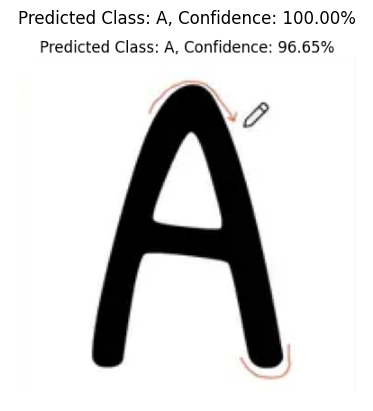

In [15]:
Prediction.predict(model=model,device=device,image_paths=path,transform=P.preprocessing_pipeline,num_feature=num_feature)